# Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis
**Name:** Sushil Khanal  
**Course Title:** Advanced Big Data and Data Mining  
**Lab Assignment Title:** Lab 1 - Data Collection, Visualization, and Analysis
**Dataset source:** https://www.kaggle.com/datasets/kyanyoga/sample-sales-data?utm_source=chatgpt.com


In [2]:
import pandas as pd

# Load the dataset into a Pandas DataFrame with a specified encoding
df = pd.read_csv("sales_data_sample.csv", encoding="latin1")

# Display the first five rows
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


**Data Visualization**

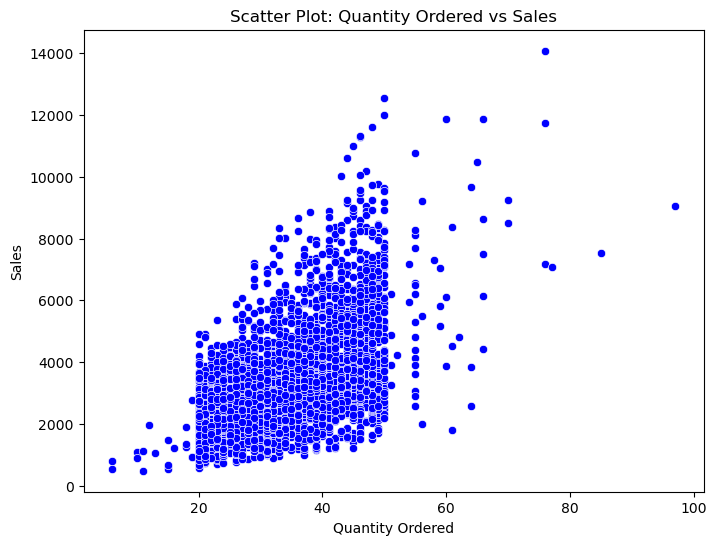

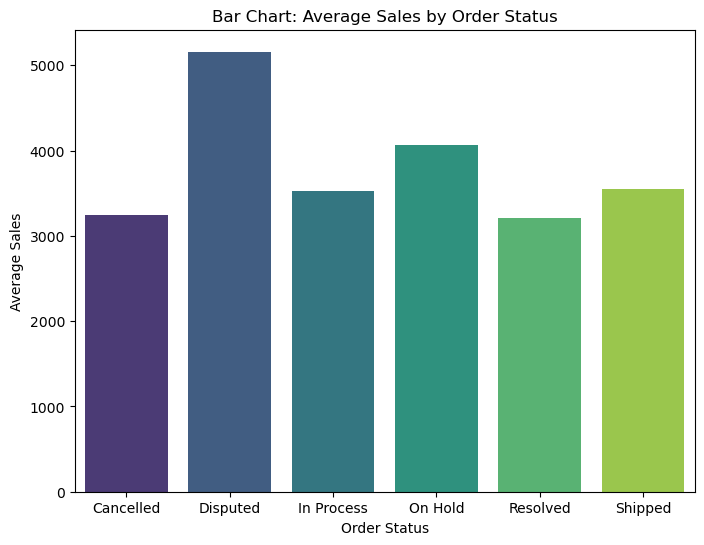

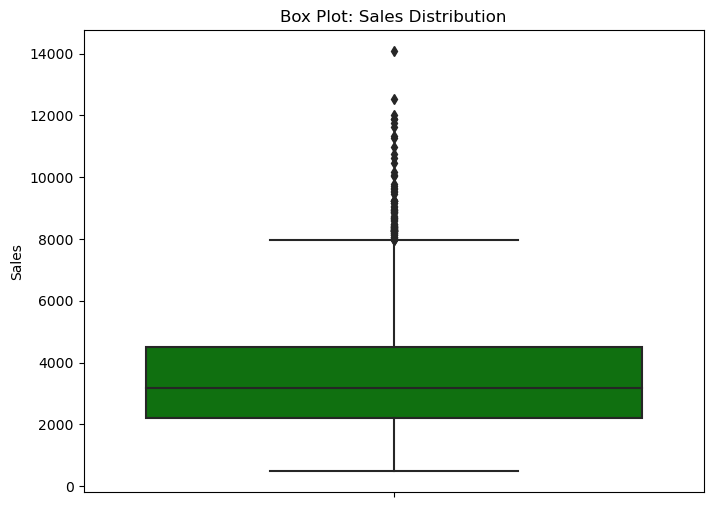

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Relationship between QUANTITYORDERED and SALES
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="QUANTITYORDERED", y="SALES", color="blue")
plt.title("Scatter Plot: Quantity Ordered vs Sales")
plt.xlabel("Quantity Ordered")
plt.ylabel("Sales")
plt.show()

# Bar Chart: Average Sales by STATUS
plt.figure(figsize=(8, 6))
avg_sales_by_status = df.groupby("STATUS")["SALES"].mean().reset_index()
sns.barplot(data=avg_sales_by_status, x="STATUS", y="SALES", palette="viridis")
plt.title("Bar Chart: Average Sales by Order Status")
plt.xlabel("Order Status")
plt.ylabel("Average Sales")
plt.show()

# Box Plot: Distribution of SALES
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="SALES", color="green")
plt.title("Box Plot: Sales Distribution")
plt.ylabel("Sales")
plt.show()


**Data Preprocessing**

In [7]:
# Step 3.1: Handling Missing Values

# Detect and report missing values before handling
missing_before = df.isnull().sum()
print("Missing values before handling:")
print(missing_before[missing_before > 0])

# Handling missing values: forward fill followed by backward fill
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Detect and report missing values after handling
missing_after = df.isnull().sum()
print("\nMissing values after handling:")
print(missing_after[missing_after > 0])


Missing values before handling:
ADDRESSLINE2    10
TERRITORY        1
dtype: int64

Missing values after handling:
Series([], dtype: int64)


**Outlier Detection and Removal using IQR method**

In [8]:
# Step 3.2: Outlier Detection and Removal using IQR method

# Select the numeric column to analyze is 'SALES'
col = 'SALES'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

print(f"IQR Calculation for '{col}':")
print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
print(f"\nIdentified outliers in '{col}':")
print(outliers[[col]])

# Remove outliers
df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"\nDataset shape before outlier removal: {df.shape}")
print(f"Dataset shape after outlier removal: {df_no_outliers.shape}")


IQR Calculation for 'SALES':
Q1 = 2203.4300000000003
Q3 = 4508.0
IQR = 2304.5699999999997

Identified outliers in 'SALES':
         SALES
30    10993.50
32     8014.82
35     9064.89
41     8014.82
43    10172.70
...        ...
2241   8844.12
2295   8209.44
2430   8977.05
2505  10066.60
2634   9558.80

[81 rows x 1 columns]

Dataset shape before outlier removal: (2823, 25)
Dataset shape after outlier removal: (2742, 25)


**Step 3.3: Data Reduction**


In [9]:
# Display dataset shape before reduction
print(f"Dataset shape before reduction: {df.shape}")

# Sampling: Randomly select 50% of the dataset
df_sampled = df.sample(frac=0.5, random_state=42)

# Dimension elimination by dropping less relevant columns like, 'ADDRESSLINE2', 'TERRITORY', etc
columns_to_drop = ['ADDRESSLINE2', 'TERRITORY']  
df_reduced = df_sampled.drop(columns=columns_to_drop, errors='ignore')

# Display dataset shape after reduction
print(f"Dataset shape after sampling: {df_sampled.shape}")
print(f"Dataset shape after column elimination: {df_reduced.shape}")


Dataset shape before reduction: (2823, 25)
Dataset shape after sampling: (1412, 25)
Dataset shape after column elimination: (1412, 23)


**Data Scaling**

In [10]:

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Step 3.4: Data Scaling and Discretization

# Display a summary of the dataset before scaling and discretization
print("Summary of 'SALES' column before scaling and discretization:")
print(df['SALES'].describe())

# Scaling: Apply Min-Max Scaling to the 'SALES' column
scaler = MinMaxScaler()
df['SALES_SCALED'] = scaler.fit_transform(df[['SALES']])

# Discretization: Bin 'SALES' into categories
bins = [0, 2000, 5000, 10000, float('inf')]  # Define bin ranges
labels = ['Low', 'Medium', 'High', 'Very High']  # Define bin labels
df['SALES_CATEGORY'] = pd.cut(df['SALES'], bins=bins, labels=labels)

# Display a summary of the dataset after scaling and discretization
print("\nSummary of 'SALES_SCALED' column:")
print(df['SALES_SCALED'].describe())
print("\nValue counts of 'SALES_CATEGORY':")
print(df['SALES_CATEGORY'].value_counts())


Summary of 'SALES' column before scaling and discretization:
count     2823.000000
mean      3553.889072
std       1841.865106
min        482.130000
25%       2203.430000
50%       3184.800000
75%       4508.000000
max      14082.800000
Name: SALES, dtype: float64

Summary of 'SALES_SCALED' column:
count    2823.000000
mean        0.225854
std         0.135425
min         0.000000
25%         0.126560
50%         0.198716
75%         0.296005
max         1.000000
Name: SALES_SCALED, dtype: float64

Value counts of 'SALES_CATEGORY':
Medium       1709
Low           565
High          533
Very High      16
Name: SALES_CATEGORY, dtype: int64


**Statistical Analysis**

In [11]:
# Step 4.1: General Overview of Data

# General information about the dataset
print("Dataset Information:")
print(df.info())

# Statistical summary of numerical columns
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ORDERNUMBER       2823 non-null   int64   
 1   QUANTITYORDERED   2823 non-null   int64   
 2   PRICEEACH         2823 non-null   float64 
 3   ORDERLINENUMBER   2823 non-null   int64   
 4   SALES             2823 non-null   float64 
 5   ORDERDATE         2823 non-null   object  
 6   STATUS            2823 non-null   object  
 7   QTR_ID            2823 non-null   int64   
 8   MONTH_ID          2823 non-null   int64   
 9   YEAR_ID           2823 non-null   int64   
 10  PRODUCTLINE       2823 non-null   object  
 11  MSRP              2823 non-null   int64   
 12  PRODUCTCODE       2823 non-null   object  
 13  CUSTOMERNAME      2823 non-null   object  
 14  PHONE             2823 non-null   object  
 15  ADDRESSLINE1      2823 non-null   object  
 16  ADD

**Central tendency**

In [12]:
# Step 4.2: Central Tendency Measures

# Calculate central tendency measures
min_values = df.min(numeric_only=True)
max_values = df.max(numeric_only=True)
mean_values = df.mean(numeric_only=True)
median_values = df.median(numeric_only=True)
mode_values = df.mode(numeric_only=True).iloc[0]

# Display results
print("Minimum Values:\n", min_values)
print("\nMaximum Values:\n", max_values)
print("\nMean Values:\n", mean_values)
print("\nMedian Values:\n", median_values)
print("\nMode Values:\n", mode_values)


Minimum Values:
 ORDERNUMBER        10100.00
QUANTITYORDERED        6.00
PRICEEACH             26.88
ORDERLINENUMBER        1.00
SALES                482.13
QTR_ID                 1.00
MONTH_ID               1.00
YEAR_ID             2003.00
MSRP                  33.00
SALES_SCALED           0.00
dtype: float64

Maximum Values:
 ORDERNUMBER        10425.0
QUANTITYORDERED       97.0
PRICEEACH            100.0
ORDERLINENUMBER       18.0
SALES              14082.8
QTR_ID                 4.0
MONTH_ID              12.0
YEAR_ID             2005.0
MSRP                 214.0
SALES_SCALED           1.0
dtype: float64

Mean Values:
 ORDERNUMBER        10258.725115
QUANTITYORDERED       35.092809
PRICEEACH             83.658544
ORDERLINENUMBER        6.466171
SALES               3553.889072
QTR_ID                 2.717676
MONTH_ID               7.092455
YEAR_ID             2003.815090
MSRP                 100.715551
SALES_SCALED           0.225854
dtype: float64

Median Values:
 ORDERNUMBER       

**Dispersion Measures**

In [16]:
# Step 4.3: Dispersion Measures

# Calculate dispersion measures
range_values = df.max(numeric_only=True) - df.min(numeric_only=True)
quartiles = df.quantile([0.25, 0.5, 0.75])
iqr_values = quartiles.loc[0.75] - quartiles.loc[0.25]
variance_values = df.var(numeric_only=True)
std_dev_values = df.std(numeric_only=True)

# Display results
print("Range:\n", range_values)
print("\nQuartiles:\n", quartiles)
print("\nInterquartile Range (IQR):\n", iqr_values)
print("\nVariance:\n", variance_values)
print("\nStandard Deviation:\n", std_dev_values)


Range:
 ORDERNUMBER          325.00
QUANTITYORDERED       91.00
PRICEEACH             73.12
ORDERLINENUMBER       17.00
SALES              13600.67
QTR_ID                 3.00
MONTH_ID              11.00
YEAR_ID                2.00
MSRP                 181.00
SALES_SCALED           1.00
dtype: float64

Quartiles:
       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0.25      10180.0             27.0      68.86              3.0  2203.43   
0.50      10262.0             35.0      95.70              6.0  3184.80   
0.75      10333.5             43.0     100.00              9.0  4508.00   

      QTR_ID  MONTH_ID  YEAR_ID   MSRP  SALES_SCALED  
0.25     2.0       4.0   2003.0   68.0      0.126560  
0.50     3.0       8.0   2004.0   99.0      0.198716  
0.75     4.0      11.0   2004.0  124.0      0.296005  

Interquartile Range (IQR):
 ORDERNUMBER         153.500000
QUANTITYORDERED      16.000000
PRICEEACH            31.140000
ORDERLINENUMBER       6.000000
SALES     

**correlation analysis**

In [14]:
# Step 4.4: Correlation Analysis
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                  ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
ORDERNUMBER         1.000000         0.065543  -0.002935        -0.055550   
QUANTITYORDERED     0.065543         1.000000   0.005564        -0.018397   
PRICEEACH          -0.002935         0.005564   1.000000        -0.020965   
ORDERLINENUMBER    -0.055550        -0.018397  -0.020965         1.000000   
SALES               0.039919         0.551426   0.657841        -0.058400   
QTR_ID             -0.051383        -0.035323   0.008712         0.040716   
MONTH_ID           -0.039723        -0.039048   0.005152         0.034016   
YEAR_ID             0.904596         0.069535  -0.005938        -0.057367   
MSRP               -0.010280         0.017881   0.670625        -0.021067   
SALES_SCALED        0.039919         0.551426   0.657841        -0.058400   

                    SALES    QTR_ID  MONTH_ID   YEAR_ID      MSRP  \
ORDERNUMBER      0.039919 -0.051383 -0.039723  0.904596 -0.010